# Bookworm


## Overview

In this project, you will build a simple question-answering agent that is able to learn from any text data you provide, and answer queries posed in natural language. You will use IBM Watson's cloud-based services to process the input text data and find relevant responses.

## Learning Objectives

By completing this project, you will learn how to:

- Create a cloud-based NLP service instance and configure it.
- Ingest a set of text documents using the service and analyze the results.
- Accept questions in natural language and parse them.
- Find relevant answers from the preprocessed text data.

## Getting Started

In order to use Watson's cloud-based services, you first need to create an account on the [IBM Bluemix platform](https://console.ng.bluemix.net/).

<div>
    <div style="display: table-cell; width: 50%;">
        <img src="images/watson-logo.png" alt="IBM Watson logo" width="200" />
    </div>
    <div style="display: table-cell; width: 50%;">
        <img src="images/bluemix-logo.png" alt="IBM Bluemix logo" width="400" />
    </div>
</div>

Then, for each service you want to use, you have to create an instance of that service. You can continue with the tasks below, and create a service instance when indicated.

## 1. Create and configure Discovery service

Create an instance of the **Discovery** service. You will use this to process a set of text documents, and _discover_ relevant facts and relationships.

- Go to the [IBM Bluemix Catalog](https://console.ng.bluemix.net/catalog/?taxonomyNavigation=services&category=watson).
- Select the service you want, **Discovery**, under the **Watson** category.
- Enter a Service Name for that instance, e.g. **Disco1** and a Credential Name, e.g. **Disco1-Creds** (these are just for you to be able to refer to later, they do not affect the functioning of the service).
- You should be able to see your newly-created service in your [Services Dashboard](https://console.ng.bluemix.net/dashboard/services).
- Open the service instance, click on the **Service credentials** tab, and then **View credentials** under Actions. This is where you will find the username and password to use when connecting to the service.

<img src="images/discovery-creds.png" alt="Discovery Service - Credentials tab" width="800" />

Save the credentials for the discovery service in a JSON file in the current directory named `service-credentials.json` with the following format:

```json
{
    "discovery": {
        "username": "<your Discovery username here>",
        "password": "<your Discovery password here>"
    },
    "conversation": {
        "username": "",
        "password": ""
    }
}

```

You will be filling out the Conversation service credentials later, when you create an instance for it. Note that you should keep these credentials secret. Please do not turn them in with your submission!

### Connect to the service instance

Let's connect to the service instance you just created using IBM Watson's [Python SDK](https://github.com/watson-developer-cloud/python-sdk). You will first need to install the SDK:
```bash
pip install watson-developer-cloud
```

Now execute each code cell below using **`Shift+Enter`**, and complete any steps indicated by a **`TODO`** comment. For more information on the Discovery service, please read the [Documentation](https://www.ibm.com/watson/developercloud/doc/discovery/index.html) and look at the [API Reference](https://www.ibm.com/watson/developercloud/discovery/api/v1/?python) as needed.

In [805]:
# Check for the correct Kernel
import sys
sys.executable

'C:\\Program Files\\Anaconda3\\envs\\aind2\\python.exe'

In [37]:
# Usual Python imports
import sys
import os
import glob
import json

# BeautifulSoup, for parsing HTML
from bs4 import BeautifulSoup

# Matplotlib, for plotting
import matplotlib.pyplot as plt
%matplotlib inline

# Watson Python SDK
import watson_developer_cloud

# Utility functions
import helper

In [806]:
# Connect to the Discovery service instance
# TODO: Ensure that your username and password from the Service Credentials tab are in service-credentials.json
# Note that these credentials are different from your IBM Bluemix login, and are specific to the service instance
discovery_creds = helper.fetch_credentials('discovery')
discovery = watson_developer_cloud.DiscoveryV1(
    version='2016-11-07',
    username=discovery_creds['username'],
    password=discovery_creds['password'])

### Create an environment

The Discovery service organizes everything needed for a particular application in an _environment_. Let's create one called "Bookworm" for this project.

> _**Note**: It is okay to run this block multiple times - it will not create duplicate environments with the same name._

In [807]:
# Prepare an environment to work in
env, env_id = helper.fetch_object(
    discovery, "environment", "Bookworm",
    create=True, create_args=dict(
        description="A space to read and understand stories",  # feel free to edit
        size=0  # use 0 for free plan (see API reference for more on sizing)
    ))
print(json.dumps(env, indent=2))

Found environment: Bookworm (befb2077-bc42-4f69-bda7-8775c317bd01)
{
  "environment_id": "befb2077-bc42-4f69-bda7-8775c317bd01",
  "name": "Bookworm",
  "description": "A space to read and understand stories",
  "created": "2017-08-01T01:16:54.322Z",
  "updated": "2017-08-01T01:16:54.322Z",
  "status": "active",
  "read_only": false,
  "size": -1,
  "index_capacity": {
    "documents": {
      "available": 42,
      "maximum_allowed": 2000
    },
    "disk_usage": {
      "used_bytes": 1879572,
      "total_bytes": 200000000,
      "used": "1.8796 MB",
      "total": "200 MB",
      "percent_used": 0.94
    },
    "memory_usage": {
      "used_bytes": -1,
      "total_bytes": -1,
      "used": "N/A",
      "total": "N/A",
      "percent_used": -1.0
    }
  }
}


### Verify configuration options

A _configuration_ defines what natural language processing routines are applied to any documents that are submitted to the service. Each environment gets a default configuration when it is created.

You can fetch the default configuration and view the different options using the following piece of code.


In [934]:
# View default configuration

cfg_id = discovery.get_default_configuration_id(environment_id=env_id)
print(cfg_id)
print(env_id)
# force to use custom configuation, away from deprecated Alchemy Configuration
cfg_id="61af08de-79ad-4aa8-bc1e-ec59bea672f4"
env_id="befb2077-bc42-4f69-bda7-8775c317bd01"
cfg = discovery.get_configuration(environment_id=env_id, configuration_id=cfg_id)
print(json.dumps(cfg, indent=2))

9592de4b-10d9-46ad-8909-e7c406e8e30f
befb2077-bc42-4f69-bda7-8775c317bd01
{
  "configuration_id": "61af08de-79ad-4aa8-bc1e-ec59bea672f4",
  "name": "andyconfig",
  "description": null,
  "created": "2017-08-01T21:41:53.839Z",
  "updated": "2017-08-07T22:09:30.320Z",
  "conversions": {
    "pdf": {
      "heading": {
        "fonts": [
          {
            "level": 1,
            "min_size": 24,
            "max_size": 80
          },
          {
            "level": 2,
            "min_size": 18,
            "max_size": 24,
            "bold": false,
            "italic": false
          },
          {
            "level": 2,
            "min_size": 18,
            "max_size": 24,
            "bold": true
          },
          {
            "level": 3,
            "min_size": 13,
            "max_size": 18,
            "bold": false,
            "italic": false
          },
          {
            "level": 3,
            "min_size": 13,
            "max_size": 18,
            "bold

There are 3 main configuration blocks that affect how input documents are processed:
 
1. **`conversions`**: How to convert documents in various formats (Word, PDF, HTML) and extract elements that indicate some structure (e.g. headings).
2. **`enrichments`**: What NLP output results are we interested in (keywords, entities, sentiment, etc.).
3. **`normalizations`**: Post-processing steps to be applied to the output. This can be left empty in most cases, unless you need the output to be normalized into a very specific format.

_**Note**: The default configuration for an environment cannot be modified. If you need to change any of the options, you will need to create a new one, and then edit it. The easiest way to do this is using the service dashboard, which is described later._

### Test your configuration

It is a good idea to test your configuration on a small sample text before you apply it to a larger document collection.

_**Note**: We have supplied a sample document (`data/sample.html`) containing the opening crawl text for Star Wars: Episode IV, but you are free to use a text of your choosing._

**Q**: (optional) If you use your own sample text, provide a brief title and description below.

**A**: I used the provided text

In [41]:
# Test configuration on some sample text
data_dir = "data"
filename = os.path.join(data_dir, "sample.html")
with open(filename, "r") as f:
    res = discovery.test_document(environment_id=env_id, configuration_id=cfg_id, fileinfo=f)
print(json.dumps(res, indent=2))

{
  "status": "completed",
  "original_media_type": "text/html",
  "snapshots": [
    {
      "step": "html_input",
      "snapshot": {
        "html": "<html>\n<head>\n    <title>Star Wars: Episode IV - A New Hope (Opening Crawl)</title>\n</head>\n<body>\n    <article>\n        <h1>Star Wars: Episode IV - A New Hope (Opening Crawl)</h1>\n        <p>\n            It is a period of civil war. Rebel spaceships, striking from a hidden base, have won their first victory against the evil Galactic Empire.\n        </p><p>\n            During the battle, Rebel spies managed to steal secret plans to the Empire's ultimate weapon, the DEATH STAR, an armored space station with enough power to destroy an entire planet.\n        </p><p>\n            Pursued by the Empire's sinister agents, Princess Leia races home aboard her starship, custodian of the stolen plans that can save her people and restore freedom to the galaxy...\n        </p>\n    </article>\n</body>"
      }
    },
    {
      "step":

## Json Recursive Parser Helper Functions

#### item_generator :recursively search json input for key, return generator

In [42]:
def item_generator(json_input, lookup_key):
    if isinstance(json_input, dict):
         for k, v in json_input.items():
            if lookup_key in k:
                yield v
            else:
                for child_val in item_generator(v, lookup_key):
                    yield child_val
    elif isinstance(json_input, list):
        for item in json_input:
            for item_val in item_generator(item, lookup_key):
                yield item_val


### Test item_generator function

In [43]:
output = next((s["snapshot"] for s in res["snapshots"] if s["step"] == "enrichments_output"), None)

print("verbs:\n=====\n")
out=item_generator(output,"verb")
for i in out:
    key=item_generator(i,"text")
    for j in key:
        print(j)

print("\n\nkeywords:\n========\n")
out=item_generator(output,"keyword")
for i in out:
    key=item_generator(i,"text")
    for j in key:
        print(j)

        
print("\n\nSubjects:\n=========\n")
out=item_generator(output,"semantic_roles")
for i in out:
    key=item_generator(i,"subject")
    for j in key:
        key2=item_generator(i,"text")    #### json_input: json formatted input
    #### lookup_keys, array of keys (either 2 or 3 elements)
        for k in key2:
            print(k)


verbs:
=====

be
win
manage
steal
destroy
Pursued
save
restore


keywords:

civil war
period
Rebel spaceships
hidden base
victory
Rebel spies
armored space station
ultimate weapon
secret plans
entire planet
Rebel spies
secret plans
Rebel spies
entire planet
Empire
Princess Leia
plans
people
freedom
galaxy
Opening Crawl
New Hope
Princess Leia races
Star Wars
evil Galactic Empire
armored space station
Rebel spaceships
Rebel spies
sinister agents
civil war
hidden base
ultimate weapon
secret plans
entire planet
DEATH STAR
custodian
Episode
starship
victory
galaxy
period
battle
home
people


Subjects:

It
a period of civil war
civil war
period
be
is
Rebel spaceships, striking from a hidden base,
Rebel spaceships
hidden base
their first victory
victory
win
have won
Rebel spies
Rebel spies
to steal secret plans to the Empire's ultimate weapon, the DEATH STAR, an armored space station with enough power to destroy an entire planet
armored space station
ultimate weapon
secret plans
entire planet

### Simplified Json Parser for Parsing 1 or 2 levels down JSON tree for matching keys, using item_generator above
    json_input: json formatted input
    lookup_keys, array of keys (either 2 or 3 elements)

In [44]:
def first_level_json_parse(json_input,lookup_keys):
    results=[]
    out=item_generator(json_input,lookup_keys[0])
    for i in out:
        key=item_generator(i,lookup_keys[1])
        for j in key:
            results.append(j)
    return results


def second_level_json_parse(json_input,lookup_keys):
    results=[]
    out=item_generator(json_input,lookup_keys[0])
    for i in out:
        key=item_generator(i,lookup_keys[1])
        for j in key:
            key2=item_generator(j,lookup_keys[2])
            for k in key2:
                results.append(k)
    return results

### Test Json Parsers, first_level/second_level_json_parse

In [45]:

print("verbs=",first_level_json_parse(output,['verb','text']))

print("\n\nkeywords=",first_level_json_parse(output,['keyword','text']))

print("\n\nsubjects=",second_level_json_parse(output,['semantic_roles','subject','text']))




verbs= ['be', 'win', 'manage', 'steal', 'destroy', 'Pursued', 'save', 'restore']


keywords= ['civil war', 'period', 'Rebel spaceships', 'hidden base', 'victory', 'Rebel spies', 'armored space station', 'ultimate weapon', 'secret plans', 'entire planet', 'Rebel spies', 'secret plans', 'Rebel spies', 'entire planet', 'Empire', 'Princess Leia', 'plans', 'people', 'freedom', 'galaxy', 'Opening Crawl', 'New Hope', 'Princess Leia races', 'Star Wars', 'evil Galactic Empire', 'armored space station', 'Rebel spaceships', 'Rebel spies', 'sinister agents', 'civil war', 'hidden base', 'ultimate weapon', 'secret plans', 'entire planet', 'DEATH STAR', 'custodian', 'Episode', 'starship', 'victory', 'galaxy', 'period', 'battle', 'home', 'people']


subjects= ['It', 'Rebel spaceships, striking from a hidden base,', 'Rebel spaceships', 'hidden base', 'Rebel spies', 'Rebel spies', 'Rebel spies', 'Rebel spies', 'Rebel spies', 'Rebel spies', 'by the Empire', 'Empire', 'the stolen plans', 'plans', 'freedom

#### Test Simplified Json parsers using first_level_json_parse multiple times to show json tree traversal

In [46]:
subject_json=first_level_json_parse(output,['semantic_roles','subject'])
subjects=item_generator(subject_json,'text')
print("\n\nsubjects_text=",list(subjects),"\n")



subjects_text= ['It', 'Rebel spaceships, striking from a hidden base,', 'Rebel spaceships', 'hidden base', 'Rebel spies', 'Rebel spies', 'Rebel spies', 'Rebel spies', 'Rebel spies', 'Rebel spies', 'by the Empire', 'Empire', 'the stolen plans', 'plans', 'freedom', 'freedom'] 



### Analyze test output

The results returned by the service contain a _snapshot_ of the information extracted at each step of processing - document conversions, enrichments and normalizations. We are interested in the output of applying enrichments (`"enrichments_output"`) or after normalizing them (`"normalizations_output"`). These should be identical if no post-processing/normalizations were specified in the configuration.

In [47]:
# Take a closer look at the results from the "enrichments_output" or "normalizations_output" step
output = next((s["snapshot"] for s in res["snapshots"] if s["step"] == "enrichments_output"), None)
print(json.dumps(output, indent=2))

{
  "extracted_metadata": {
    "title": "Star Wars: Episode IV - A New Hope (Opening Crawl)"
  },
  "html": "<?xml version='1.0' encoding='UTF-8' standalone='yes'?><html>\n<head>\n    <meta content=\"text/html; charset=UTF-8\" http-equiv=\"Content-Type\"/>\n    \n    <title>Star Wars: Episode IV - A New Hope (Opening Crawl)</title>\n\n\n</head>\n<body>\n\n\n    <article>\n        <h1>Star Wars: Episode IV - A New Hope (Opening Crawl)</h1>\n        <p>\n            It is a period of civil war. Rebel spaceships, striking from a hidden base, have won their first victory against the evil Galactic Empire.\n        </p><p>\n            During the battle, Rebel spies managed to steal secret plans to the Empire's ultimate weapon, the DEATH STAR, an armored space station with enough power to destroy an entire planet.\n        </p><p>\n            Pursued by the Empire's sinister agents, Princess Leia races home aboard her starship, custodian of the stolen plans that can save her people and res

### Query for document sentiment score

In [813]:
score=second_level_json_parse(output,['enriched_text',"sentiment",'document'])
print(score)
print("The document score is:",score[0]['score'])

[{'score': -0.575489, 'label': 'negative'}]
The document score is: -0.575489


### Query for Concept Relevance

In [49]:
# concepts=first_level_json_parse(output,['concepts',"text"])
concepts=item_generator(output,'concepts')
concepts_less_fifty=[concept for concept in concepts if concept[0]['relevance'] >0.5 ]

print("Relevance       Concept\n========================\n")
for concept in concepts_less_fifty[0]:
    print("{0:.2f}".format(concept['relevance']),":::", concept['text'])


Relevance       Concept

0.99 ::: Star Wars Episode IV: A New Hope
0.99 ::: Star Wars
0.91 ::: Rebel Alliance
0.81 ::: Luke Skywalker
0.80 ::: Star Wars Episode V: The Empire Strikes Back
0.78 ::: Darth Vader
0.77 ::: Star Wars Episode VI: Return of the Jedi
0.75 ::: Grand Moff Tarkin


Answer the following questions based on the output above. Note that it contains the input HTML, extracted text and metadata as well as the actual enrichment results (`"enriched_text"` block).

#### Sentiment

**Q**: What is the overall sentiment detected in this text? Mention the `type` (positive/negative) and `score`.<br />
(_Hint: Look for the `"docSentiment"` key in the output._)

**A**: negative, with a score of -0.575489


#### Concepts

**Q**: List 3 concepts that have been identified with a relevance > 0.5. Note that not all concepts here may be present directly in the text, some may have been inferred by Watson.<br />
(_Hint: Look for `"concepts"`._)

**A**:
    Relevance       Concept
    ========================

    0.99 ::: Star Wars Episode IV: A New Hope
    0.99 ::: Star Wars
    0.91 ::: Rebel Alliance
    0.81 ::: Luke Skywalker
    0.80 ::: Star Wars Episode V: The Empire Strikes Back
    0.78 ::: Darth Vader
    0.77 ::: Star Wars Episode VI: Return of the Jedi
    0.75 ::: Grand Moff Tarkin



#### Relations

Each relation is essentially a deeper analysis of a sentence (or part of a sentence). Here is a sample relation:
```json
{
  "sentence": " During the battle, Rebel spies managed to steal secret plans to the Empire's ultimate weapon, the DEATH STAR, an armored space station with enough power to destroy an entire planet.",
  "subject": {
    "text": "Rebel spies",
    "keywords": [
      {
        "text": "Rebel spies"
      }
    ]
  },
  "action": {
    "text": "managed to steal",
    "lemmatized": "manage to steal",
    "verb": {
      "text": "steal",
      "tense": "future"
    }
  },
  "object": {
    "text": "secret plans",
    "keywords": [
      {
        "text": "secret plans"
      }
    ]
  }
 }
```

In this case, Watson seems to have done a pretty good job of extracting some meaning from the sentence.

**Q**: Find a relation where the extracted meaning is not as accurate, or not what you would've expected. List the `sentence`, `subject`, `action` and `object` parts as identified, and what you would've marked instead.<br />
(_Hint: Look for `"relations"`._)

**A**: 
```json
{
        "sentence": " Pursued by the Empire's sinister agents, Princess Leia races home aboard her starship, custodian of the stolen plans that can save her people and restore freedom to the galaxy...",
        "subject": {
          "text": "by the Empire",
          "sentiment": {
            "type": "positive",
            "score": 0.554106,
            "mixed": false
          },
          "keywords": [
            {
              "text": "Empire"
            }
          ]
        },
        "action": {
          "text": "Pursued",
          "lemmatized": "Pursued",
          "verb": {
            "text": "Pursued",
            "tense": "past"
          }
        },
        "object": {
          "text": "Princess Leia",
          "sentiment": {
            "type": "positive",
            "score": 0.682563,
            "mixed": false
          },
          "keywords": [
            {
              "text": "Princess Leia"
            }
          ]
        }
      }
```
  The sentence seems to be a difficult one, what i would have marked would have been:
  
        "subject": {
          "text": "Princess Leia",
        "action": {
          "text": "races home aboard",
        "object": {
          "text": "starship",
      

#### Keywords

You may have noticed that Watson identifies some `"keywords"` in the relations, e.g. `"Rebel spies"` and `"secret plans"` in the Star Wars example above. The output also contains a list of all keywords at the top level, for your convenience, along with their relevance to the document and sentiment conveyed. Let's visualize these keywords as a word cloud!

Note: We'll be using this handy [worldcoud library](https://github.com/amueller/word_cloud) to generate the visualization. So you will need to install it first:
```bash
pip install wordcloud
```

(-0.5, 799.5, 599.5, -0.5)

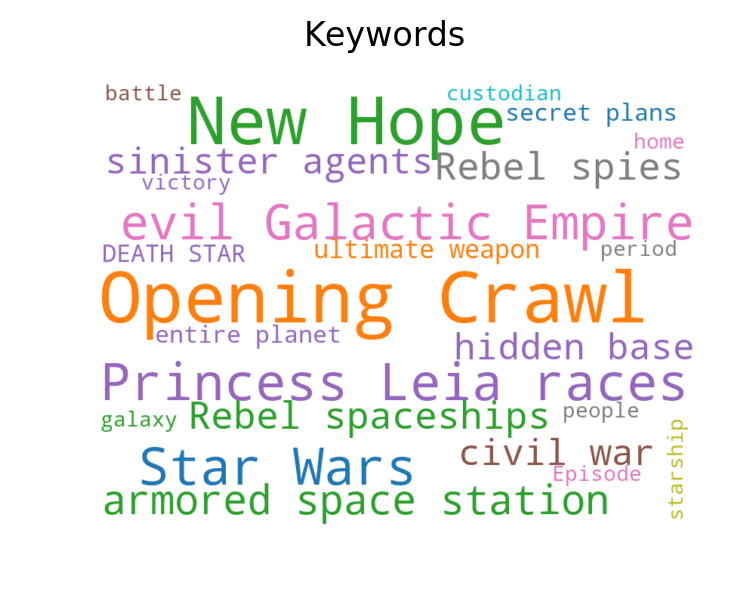

In [16]:
# Visualize keywords by relevance as a wordcloud
from wordcloud import WordCloud
wc_title="Keywords"

wc_data = { w["text"]: w["relevance"] for w in output["enriched_text"]["keywords"] }
wc = WordCloud(width=400, height=300, scale=2, background_color="white", colormap="tab10")
wc.generate_from_frequencies(wc_data)  # use precomputed relevance instead of frequencies
plt.figure(figsize=(4, 3), dpi=200)
plt.imshow(wc, interpolation='bilinear')
plt.suptitle(wc_title)

plt.axis("off")

Feel free to play with this visualization and improve it. What about using a different metric instead of relevance, e.g. direct word frequencies that the wordcloud library computes by default?

#### Other results

Watson's output also includes processed results from other enrichments that were applied to the text, including entities and taxonomy (what topic or category does this text relate to).

```json
"taxonomy": [
  {
    "label": "/art and entertainment/movies and tv/movies",
    "score": 0.584247,
    "confident": false
  },
  {
    "label": "/society/unrest and war",
    "score": 0.517031,
    "confident": false
  },
  {
    "confident": false,
    "label": "/law, govt and politics/armed forces/army",
    "score": 0.215561
  }
],
```

Get a good sense of all the different pieces of information available in the results. Start thinking about which ones will be useful for looking up answers to questions, and how you might use them.

(-0.5, 799.5, 599.5, -0.5)

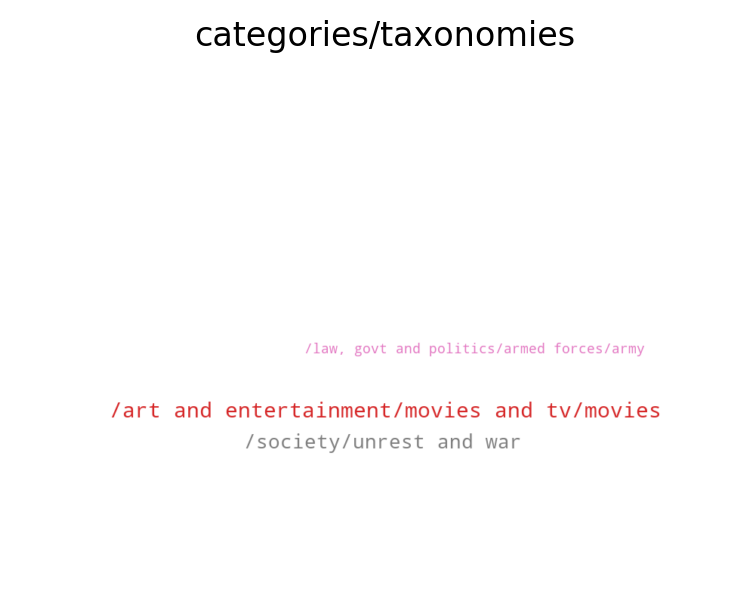

In [18]:
wc_title="categories/taxonomies"
wc_data = { w["label"]: w["score"] for w in output["enriched_text"]["categories"] }
wc = WordCloud(width=400, height=300, scale=2, background_color="white", colormap="tab10")
wc.generate_from_frequencies(wc_data)  # use precomputed relevance instead of frequencies

plt.figure(figsize=(4, 3), dpi=200)
plt.imshow(wc, interpolation='bilinear')
plt.suptitle(wc_title)
plt.axis("off")

#below works with old alchemy schema
# wc_data = { w["label"]: w["score"] for w in output["enriched_text"]["taxonomy"] }
# wc = WordCloud(width=400, height=300, scale=2, background_color="white", colormap="Vega10")
# wc.generate_from_frequencies(wc_data)  # use precomputed relevance instead of frequencies

# plt.figure(figsize=(4, 3), dpi=200)
# plt.imshow(wc, interpolation='bilinear')
# plt.axis("off")


(-0.5, 3999.5, 2999.5, -0.5)

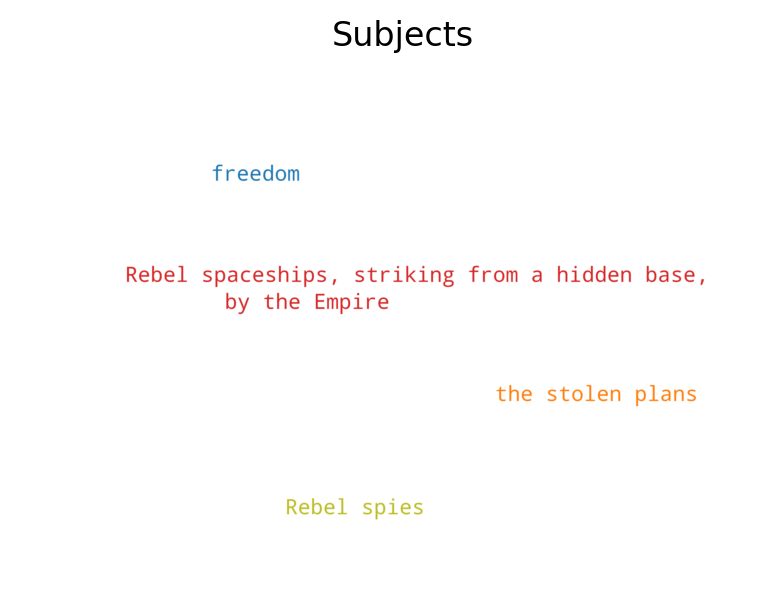

In [19]:
from pprint import pprint as pp
wc_title="Subjects"
wc_sent = output["enriched_text"]['semantic_roles'] 
wc_data={}
for sent in wc_sent:
    obj=sent["subject"]
    for sent in obj.keys():
        if "keywords" in sent:
            wc_data[obj["text"]]=1
wc = WordCloud(width=400, height=300, scale=10, background_color="white", colormap="tab10")
wc.generate_from_frequencies(wc_data)  # use precomputed relevance instead of frequencies

plt.figure(figsize=(4, 3), dpi=200)
plt.imshow(wc, interpolation='bilinear')
plt.suptitle(wc_title)
plt.axis("off")


(-0.5, 3999.5, 2999.5, -0.5)

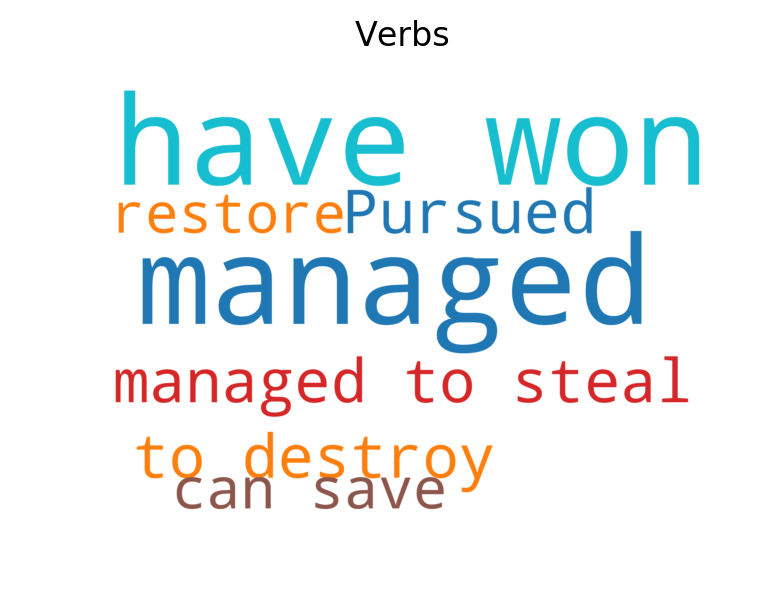

In [21]:
from pprint import pprint as pp
wc_title="Verbs"
wc_sent = output["enriched_text"]['semantic_roles'] 
wc_data={}
for sent in wc_sent:
    obj=sent["action"]
    for sent in obj.keys():
        if "verb" in sent and "is" not in obj["text"]:
            wc_data[obj["text"]]=1
wc = WordCloud(width=400, height=300, scale=10, background_color="white", colormap="tab10")
wc.generate_from_frequencies(wc_data)  # use precomputed relevance instead of frequencies

plt.figure(figsize=(4, 3), dpi=200)
plt.imshow(wc, interpolation='bilinear')
plt.suptitle(wc_title)
plt.axis("off")


(-0.5, 3999.5, 2999.5, -0.5)

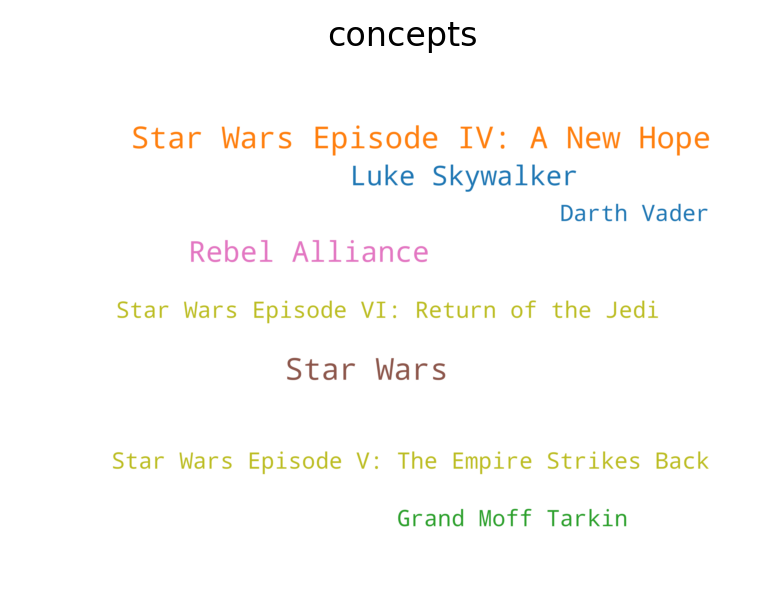

In [22]:
wc_title="concepts"
wc_data = { w["text"]: w["relevance"] for w in output["enriched_text"]['concepts'] }
wc = WordCloud(width=400, height=300, scale=10, background_color="white", colormap="tab10")
wc.generate_from_frequencies(wc_data)  # use precomputed relevance instead of frequencies

plt.figure(figsize=(4, 3), dpi=200)
plt.imshow(wc, interpolation='bilinear')
plt.suptitle(wc_title)
plt.axis("off")

### query examples for deprecated Alchemy schema (not used)

In [ ]:
# below works with standard config (which uses old alchemy processing, not NLU)
# from pprint import pprint as pp
# wc_sent = output["enriched_text"]['relations'] 
# wc_data={}
# for sent in wc_sent:
#     obj=sent["object"]
#     for sent in obj.keys():
#         if "sentiment" == sent:
#             wc_data[obj["text"]]=obj[sent]["score"]+0.5
#             print(obj[sent]["score"])
#             print(obj["text"])
# wc = WordCloud(width=400, height=300, scale=10, background_color="white", colormap="Vega10")
# wc.generate_from_frequencies(wc_data)  # use precomputed relevance instead of frequencies

# plt.figure(figsize=(4, 3), dpi=200)
# plt.imshow(wc, interpolation='bilinear')
# plt.axis("off")

## 2. Ingest documents

### Create a collection

A _collection_ is used to organize documents of the same kind. For instance, you may want to create a collection of book reviews, or a collection of Wikipedia articles, but it may not make much sense to mix the two groups. This allows Watson to make meaningful inferences over the set of documents, find commonalities and identify important concepts.

Let's create one called "Story Chunks".

In [814]:
# Prepare a collection of documents to use
col, col_id = helper.fetch_object(discovery, "collection", "Story Chunks", environment_id=env_id,
    create=True, create_args=dict(
        environment_id=env_id, configuration_id=cfg_id,
        description="Stories and plots split up into chunks suitable for answering"
    ))

print(json.dumps(col, indent=2))

Found collection: Story Chunks (f1d6355f-6b33-4e4f-aaa7-28ce45bd3e38)
{
  "collection_id": "f1d6355f-6b33-4e4f-aaa7-28ce45bd3e38",
  "name": "Story Chunks",
  "configuration_id": "61af08de-79ad-4aa8-bc1e-ec59bea672f4",
  "language": "en",
  "status": "active",
  "description": "Stories and plots split up into chunks suitable for answering",
  "created": "2017-08-08T03:48:54.230Z",
  "updated": "2017-08-08T03:48:54.230Z",
  "document_counts": {
    "available": 42,
    "processing": 0,
    "failed": 0
  },
  "disk_usage": {
    "used_bytes": 1879413
  },
  "training_status": {
    "data_updated": "",
    "total_examples": 0,
    "sufficient_label_diversity": false,
    "processing": false,
    "minimum_examples_added": false,
    "successfully_trained": "",
    "available": false,
    "notices": 0,
    "minimum_queries_added": false
  }
}


Once you have created a collection, you should be able to view it using the Discovery Service tool. To open, go to the **Manage** tab for your service instance, and click the **Launch tool** button.

<img src="images/discovery-manage.png" alt="Discovery service - Manage tab" width="800" />


Here you should see the "Story Chunks" collection you just created.

<img src="images/discovery-tooling.png" alt="Discovery service - Tool showing collections" width="800" />

You can open the collection to view more details about it. If you need to modify configuration options, click the **Switch** link and create a new configuration (the default one cannot be changed).

## Helper functions to clean UTF/ASCI encoding strings and fix_synonyms to help with standardizing outputs

In [801]:
def fix_encoding(data):
    data=data.replace("u00c3","")
    data=data.replace("u00a9","")
    data=data.replace("u00e2","")
    data=data.replace("u201c","")
    data=data.replace("u20ac","")
    data=data.replace("u0153","")
    data=data.replace("u201d","")
    data=data.replace("u017","")
    data=data.replace("Padm\\","Padm")
    data=data.replace("\\'s","'s")
    data=data.replace("\'","'")
    data=data.replace("),",",")
    data=data.replace(",)","")
    data=data.replace("('","")
    data=data.replace("\"}'","")
    data=data.replace("s\\'","s'")
    data=data.replace("\\\\\"","\"")
    data=data.replace("","")
    data=data.replace("\\'","'")
    data=data.replace("\\\\\\","")
    data=data.replace("\\\\","")
    data=data.replace("\\","")
    data=data.replace('â€“',"\"")
    data=data.replace("â€™","'")
    data=data.replace("ÃŽ","I")
    data=data.replace("Ã©","a")
    data=data.replace("\\'s","'s")
    data=data.replace("\'s","'s")
     
    return data


import re

def remove_case_insensitive(orig_text,replacement_text,data):
    insenistive_data=re.compile(re.escape(orig_text),re.IGNORECASE)
    return insenistive_data.sub(replacement_text,data)
    

def fix_synonyms(data):
    data=remove_case_insensitive("Luke Skywalker","Luke",data)
    data=remove_case_insensitive("Luke","Luke Skywalker",data)
    data=remove_case_insensitive("Princess Leia","Leia",data)
    data=remove_case_insensitive("Leia Skywalker","Leia",data)
    data=remove_case_insensitive("Leia","Princess Leia",data)
    data=remove_case_insensitive("Han Solo" ,"HanSolo",data)
    data=remove_case_insensitive("Han.","HanSolo.",data)
    data=remove_case_insensitive("Han,","HanSolo,",data)
    data=remove_case_insensitive("HanSolo","Han Solo",data)
    data=remove_case_insensitive("Anakin Skywalker","Anakin",data)
    data=remove_case_insensitive("Darth Vader","Vader",data)
    data=remove_case_insensitive("Anakin","Vader",data)
    data=remove_case_insensitive("Vader","Darth Vader",data)
    data=remove_case_insensitive("Lando Calrissian","Lando",data)
    data=remove_case_insensitive("Lando","Lando Calrissian",data)
    data=remove_case_insensitive("Boba Fett","Fett",data)
    data=remove_case_insensitive("Boba","Fett",data)
    data=remove_case_insensitive("Fett","Boba Fett",data)
    data=remove_case_insensitive("Obi-Wan-Kenobi","Obi",data)
    data=remove_case_insensitive("Obi Wan-Kenobi","Obi",data)
    data=remove_case_insensitive("Obi Wan Kenobi","Obi",data)
    data=remove_case_insensitive("Obi-Wan Kenobi","Obi",data)
    data=remove_case_insensitive("Obi Wan","Obi",data)
    data=remove_case_insensitive("Obi-Wan","Obi",data)
    data=remove_case_insensitive("Ben Kenobi ","Obi",data)
    data=remove_case_insensitive("Ben","Obi ",data)
    data=remove_case_insensitive("Obi","Obi-Wan Kenobi",data)
    data=remove_case_insensitive("Millennium Falcon","Falcon",data)
    data=remove_case_insensitive("Falcon","Millennium Falcon",data)
    data=remove_case_insensitive("Jar Jar Binks","JarJar",data)
    data=remove_case_insensitive("Jar Jar"," JarJar",data)
    data=remove_case_insensitive("JarJar","Jar Jar Binks",data)
    data=remove_case_insensitive("Rebel Alliance","Rebels",data)
    
    return data
    

### Testing out fix_synonyms and fix_encoding with test text

In [802]:
test="Obi wan is awesome,\\u20ac except foru20ac the Rebel allIANce, chewbacca\'s fur\\'s and maybe lUkE's. sister leia.\\"
print(fix_synonyms(fix_encoding((test))))

test="Obi wan is awesome,\\u20ac except foru20ac the Rebel allIANce, chewbacca\'s fur\\'s and maybe lUkE's sister leia.\\"
print(fix_encoding(fix_synonyms(test)))

test="vader and anakin skywalker is luke skywalkers father, and he used the saber's light to cut off Vaders hand"
print(fix_encoding(fix_synonyms(test)))



Obi-Wan Kenobi is awesome, except for the Rebels, chewbacca's fur's and maybe Luke Skywalker's. sister Princess Leia.
Obi-Wan Kenobi is awesome, except for the Rebels, chewbacca's fur's and maybe Luke Skywalker's sister Princess Leia.
Darth Vader and Darth Vader is Luke Skywalkers father, and he used the saber's light to cut off Darth Vaders hand


### For Completely deleting the Collection
    use this to programatically delete the collection, set delete_collection to True

In [816]:
# use this to programatically delete the collection, set delete_collection to True
delete_collection=False
if delete_collection:
    discovery.delete_collection(environment_id=env_id, collection_id=col_id)


### For deleting documents from existing collection
    Use this to delete all documents previously uploaded to discovery service, preserves configuration settings

In [548]:
delete_docs=False
if delete_docs:
    with open('doc_ids.json','r') as doc_id_filep:
        json_file=json.load(fp=doc_id_filep)
        for doc_id in json_file:
            print("deleting:",doc_id)
            discovery.delete_document(environment_id=env_id,collection_id=col_id,document_id=doc_id)


### Normalization Rules
    they didnt stick.

<img src="images/normalize.png" alt="Fields for Normalize" width="600" />

### Add documents

Okay, now that we have everything set up, let's add a set of "documents" we want Watson to look up answers from, using the Python SDK. Note that Watson treats each "document" as a unit of text that is returned as the result of a query. But we want to retrieve a paragraph of text for each question. So, let's split each file up into individual paragraphs. We will use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library for this purpose.

_**Note**: You could also add and manage documents in the collection using the Discovery tool, but you would have to split paragraphs up into separate files._

_**Note**: We have provided a set of files (`data/Star-Wars/*.html`) with summary plots for Star Wars movies, but you are free to use a collection of your choice. Open one of the files in a text editor to see how the paragraphs are delimited using `<p>...</p>` tags - this is how the code block below split paragraphs into separate "documents"._

In [549]:
# Add documents to collection
doc_ids = []  # to store the generated id for each document added

for filename in glob.glob(os.path.join(data_dir, "Star-Wars", "*.html")):
    print("Adding file:", filename)
    with open(filename, "r") as f:
        # Split each individual <p> into its own "document"
        doc = f.read()
        soup = BeautifulSoup(doc, 'html.parser')
        for i, p in enumerate(soup.find_all('p')):
            paragraph=p.get_text(strip=True)
            paragraph=fix_encoding(paragraph)
            doc_info = discovery.add_document(environment_id=env_id, collection_id=col_id,
                file_data=json.dumps({"text": paragraph}),
                mime_type="application/json",
                metadata={"title": soup.title.get_text(strip=True)})
            doc_ids.append(doc_info["document_id"])
print("Total", len(doc_ids), "documents added.")

Adding file: data\Star-Wars\Episode-III_Revenge-of-the-Sith.html
Adding file: data\Star-Wars\Episode-II_Attack-of-the-Clones.html
Adding file: data\Star-Wars\Episode-IV_A-New-Hope.html
Adding file: data\Star-Wars\Episode-I_The-Phantom-Menace.html
Adding file: data\Star-Wars\Episode-VII_The-Force-Awakens.html
Adding file: data\Star-Wars\Episode-VI_Return-of-the-Jedi.html
Adding file: data\Star-Wars\Episode-V_The-Empire-Strikes-Back.html
Adding file: data\Star-Wars\Rogue-One.html
Total 42 documents added.


If you look at the collection details, you may notice that the `"document_counts"` field now shows some documents as `available` or `processing`. Once processing is complete, you should see all the documents under the `available` count.

### Save Document Id's to file
        In order to easily delete documents if needed.

In [550]:
# save doc_id's to file
with open('doc_ids.json', 'w') as doc_id_filep:
    json.dump(doc_ids,fp=doc_id_filep)

# Check for doc_ids
with open('doc_ids.json','r') as doc_id_filep:
    json_file=json.load(fp=doc_id_filep)
    print(json.dumps(json_file))

["cee4c7d5-ec24-4cf3-a7fc-fc347ea94cf4", "1b9ce928-1a31-400b-b683-4ddc8195dbf9", "2986d604-787f-4d4b-9482-5d00575085f3", "fc3b8c4c-53cc-45ca-be00-efeca881b6e0", "f6692f9f-4ab1-4580-95d6-c1a37ea37151", "3818fdbe-cb15-437f-a7f2-f2c7623f36dc", "8ece8b12-136f-460c-ada4-10e43ebb5d76", "aa2a4f2d-e19d-4c86-a5e9-95f39ca959d8", "6a8a713e-8c35-4036-98b6-83ca7c82c5da", "b1e7a03e-db2a-4fad-9586-0f999b54f220", "03b40293-0fa4-4b29-96df-251c74b6a3d3", "18613f75-bb49-4604-b3c2-910cfb717385", "ec744503-915a-446a-9d7b-2e54dc3d3144", "94d0506c-5e91-425c-9b78-a5f48faf7970", "ae274d63-316d-4bed-9fa8-fc8b3670b6a8", "4a2b16d3-b26c-4735-9a32-650dd760b94d", "e83e13a5-731b-47f7-81b1-7531a06fd250", "32621e59-d05e-40cf-9619-340936e81c19", "ed8ff729-cc65-4727-ab1f-621d03a6daad", "5805855c-6c6b-464a-9be0-5ef759340925", "e5c6345c-3834-41f0-bcec-527c78e2d2f9", "1f7c76df-32c5-40d5-bb64-caa315f7405f", "2afad3c3-a24c-4ddb-8152-842cadc0cd1d", "e751f2ad-00f5-4b72-97f0-9f817ba011c2", "80bbe38a-23fd-406b-9296-68f549109055",

In [551]:
# View collection details to verify all documents have been processed
col, col_id = helper.fetch_object(discovery, "collection", "Story Chunks", environment_id=env_id)
print(json.dumps(col, indent=2))

Found collection: Story Chunks (f1d6355f-6b33-4e4f-aaa7-28ce45bd3e38)
{
  "collection_id": "f1d6355f-6b33-4e4f-aaa7-28ce45bd3e38",
  "name": "Story Chunks",
  "configuration_id": "61af08de-79ad-4aa8-bc1e-ec59bea672f4",
  "language": "en",
  "status": "active",
  "description": "Stories and plots split up into chunks suitable for answering",
  "created": "2017-08-08T03:48:54.230Z",
  "updated": "2017-08-08T03:48:54.230Z",
  "document_counts": {
    "available": 42,
    "processing": 0,
    "failed": 0
  },
  "disk_usage": {
    "used_bytes": 1878947
  },
  "training_status": {
    "data_updated": "",
    "total_examples": 0,
    "sufficient_label_diversity": false,
    "processing": false,
    "minimum_examples_added": false,
    "successfully_trained": "",
    "available": false,
    "notices": 0,
    "minimum_queries_added": false
  }
}


So, what did the Discovery service learn? If you list the fields extracted from the set of documents in the collection as part of the enrichment process, you'll see familiar fields like `concepts`, `entities` and `keywords` that were returned in the test analysis.

In [470]:
# List all fields extracted
discovery.list_collection_fields(environment_id=env_id, collection_id=col_id)

{'fields': [{'field': 'b6c4a1a0-6f20-4867-9a55-436fe505703d.mappings.document._all.analyzer',
   'type': 'english'},
  {'field': 'enriched_text', 'type': 'nested'},
  {'field': 'extracted_metadata', 'type': 'nested'},
  {'field': 'metadata', 'type': 'nested'},
  {'field': 'text', 'type': 'string'},
  {'field': 'text.analyzer', 'type': 'english'},
  {'field': 'enriched_text.properties.categories', 'type': 'nested'},
  {'field': 'enriched_text.properties.concepts', 'type': 'nested'},
  {'field': 'enriched_text.properties.emotion', 'type': 'nested'},
  {'field': 'enriched_text.properties.entities', 'type': 'nested'},
  {'field': 'enriched_text.properties.keywords', 'type': 'nested'},
  {'field': 'enriched_text.properties.semantic_roles', 'type': 'nested'},
  {'field': 'enriched_text.properties.sentiment', 'type': 'nested'},
  {'field': 'extracted_metadata.properties.file_type', 'type': 'string'},
  {'field': 'extracted_metadata.properties.file_type.analyzer',
   'type': 'english'},
  {'fi

### List all fields that are usable in query construction

In [195]:
discovery_list=discovery.list_collection_fields(environment_id=env_id, collection_id=col_id)
dl=first_level_json_parse(discovery_list,['field','field'])
print(json.dumps(dl,indent=3))


[
   "b6c4a1a0-6f20-4867-9a55-436fe505703d.mappings.document._all.analyzer",
   "enriched_text",
   "extracted_metadata",
   "metadata",
   "text",
   "text.analyzer",
   "enriched_text.properties.categories",
   "enriched_text.properties.concepts",
   "enriched_text.properties.emotion",
   "enriched_text.properties.entities",
   "enriched_text.properties.keywords",
   "enriched_text.properties.semantic_roles",
   "enriched_text.properties.sentiment",
   "extracted_metadata.properties.file_type",
   "extracted_metadata.properties.file_type.analyzer",
   "extracted_metadata.properties.filename",
   "extracted_metadata.properties.filename.analyzer",
   "extracted_metadata.properties.sha1",
   "extracted_metadata.properties.sha1.analyzer",
   "metadata.properties.title",
   "metadata.properties.title.analyzer",
   "enriched_text.properties.categories.properties.label",
   "enriched_text.properties.categories.properties.label.analyzer",
   "enriched_text.properties.categories.properties.sc

### Lets find all the queryable fields containing "subject"

In [198]:
from pprint import pprint as pp
sentence_fields=[field for field in dl if "subject" in field ]
pp(sentence_fields)

['enriched_text.properties.semantic_roles.properties.subject',
 'enriched_text.properties.semantic_roles.properties.subject.properties.entities',
 'enriched_text.properties.semantic_roles.properties.subject.properties.keywords',
 'enriched_text.properties.semantic_roles.properties.subject.properties.text',
 'enriched_text.properties.semantic_roles.properties.subject.properties.text.analyzer',
 'enriched_text.properties.semantic_roles.properties.subject.properties.entities.properties.disambiguation',
 'enriched_text.properties.semantic_roles.properties.subject.properties.entities.properties.text',
 'enriched_text.properties.semantic_roles.properties.subject.properties.entities.properties.text.analyzer',
 'enriched_text.properties.semantic_roles.properties.subject.properties.entities.properties.type',
 'enriched_text.properties.semantic_roles.properties.subject.properties.entities.properties.type.analyzer',
 'enriched_text.properties.semantic_roles.properties.subject.properties.keywords.

### Test query

Let's perform a simple query to see if the service can fetch the proper document for us:
> _Look for all paragraphs that have a relation (sentence) with "Jar Jar" as the subject, and return the title and text._


In [822]:
keyword="Jar Jar"
results = discovery.query(environment_id=env_id, collection_id=col_id,
    query_options={
        "query": "enriched_text.semantic_roles.subject.keywords.text:"+keyword,
         "return": "metadata.title,text,enriched_text.semantic_roles.subject.keywords.text"
    })

subject_results=second_level_json_parse(results,['subject','keywords','text'])
subject_count=subject_results.count(keyword)
print("\n\n============= Double Check String Match Check ==============================\n"+subject_results[subject_results.index(keyword)]," Was found as subject of sentence "+str(subject_count)+" times.")
print("\n=================================================================\n\n")
print("Here are the source results:\n")
for idx in range(0,len(results['results'])):
                 print("\n=================\nParagraph number:"+str(idx+1)+"\n")
                 print(json.dumps(results['results'][idx]['metadata']['title'],indent=3)+"\n")
                 print("Source Paragraph:\n"+json.dumps(results['results'][idx]['text'],indent=3)+"\n")




============= Double Check String Match Check ==============================
Jar Jar  Was found as subject of sentence 3 times.



Here are the source results:


Paragraph number:1

"Star Wars: Episode I - The Phantom Menace"

Source Paragraph:
"Supreme Chancellor Valorum, leader of the Galactic Republic, dispatches Jedi Knight Qui-Gon Jinn and his apprentice, Obi-Wan Kenobi, to negotiate with the Trade Federation leadership to end a blockade of battleships around the planet Naboo. Darth Sidious, a Sith Lord and the Trade Federation's secret adviser, orders Federation Viceroy Nute Gunray to kill the Jedi and invade Naboo with an army of battle droids. The Jedi escape and flee to Naboo, where Qui-Gon saves a Gungan outcast, Jar Jar Binks, from being run over and killed by a droid tank during the invasion. Indebted to the Jedi, Jar Jar leads them to an underwater Gungan city. The Jedi unsuccessfully try to persuade the Gungan leader, Boss Nass, into helping the people of Naboo, though 

### simple test query using "Darth Vader"

In [819]:
print("using environment:",env_id)
print("using collection:",col_id,"\n")

keyword="Darth Vader"

results = discovery.query(environment_id=env_id, collection_id=col_id,
    query_options={
         "query": "enriched_text.semantic_roles.subject.keywords.text:"+keyword,
         "return": "metadata.title,text"
    })


print("Lets double check results actually found:"+keyword+" in the text")
print("=========================================\n")
num_articles=len(results['results'])
count=0
if num_articles==0:
    print("nothing found.")
else:
    for i in range(0,num_articles):
        text_retrived=results['results'][i]['text']
        if keyword in text_retrived:
            print("Found \""+keyword+"\" in article:"+str(i)+" of "+results['results'][i]['metadata']['title'])
            count+=1
if (count==num_articles):
    print("\n\nSuccess!! All articles contained keyword:"+keyword)
print("\n\nResults returned:\n================\n")
print(json.dumps(results, indent=2))


using environment: befb2077-bc42-4f69-bda7-8775c317bd01
using collection: f1d6355f-6b33-4e4f-aaa7-28ce45bd3e38 

Lets double check results actually found:Darth Vader in the text

Found "Darth Vader" in article:0 of Star Wars: Episode V - The Empire Strikes Back
Found "Darth Vader" in article:1 of Star Wars: Episode VI - Return of the Jedi
Found "Darth Vader" in article:3 of Star Wars: Episode V - The Empire Strikes Back


Results returned:

{
  "matching_results": 16,
  "results": [
    {
      "id": "d4f9480f-c326-4e59-821e-fe37c36a740c",
      "score": 3.1728954,
      "metadata": {
        "title": "Star Wars: Episode V - The Empire Strikes Back"
      },
      "text": "Three years after the destruction of the Death Star, the Rebel Alliance has been driven from their former base on Yavin IV by the Galactic Empire. The Rebels, led by Princess Leia, have set up their new base on the ice planet Hoth. The Imperial fleet, led by Darth Vader, continues to hunt for the Rebels' new base by 

### simple query for luke as subject

In [478]:
# A simple query, luke as subject
print("using environment:",env_id)
print("using collection:",col_id,"\n")

keyword="Luke"

results = discovery.query(environment_id=env_id, collection_id=col_id,
    query_options={
         "query": "enriched_text.semantic_roles.subject.keywords.text:"+keyword,
         "return": "metadata.title,enriched_text"
    })

print("when searching for subjects of: \""+keyword+"\" found...\n")
num_articles=len(results['results'])
if num_articles==0:
    print("nothing found.")
else:
    for i in range(0,num_articles):
        text_retrived=results['results'][i]['enriched_text']['entities']
        if keyword in text_retrived:
            print("Found \""+keyword+"\" in article:"+str(i)+" of "+results['results'][i]['metadata']['title'])
print("\n\nResults returned:\n================\n")
print(json.dumps(results, indent=2))


using environment: befb2077-bc42-4f69-bda7-8775c317bd01
using collection: b6c4a1a0-6f20-4867-9a55-436fe505703d 

when searching for subjects of: "Luke" found...



Results returned:

{
  "matching_results": 13,
  "results": [
    {
      "id": "a6855d8d-8135-4aa6-a82f-a7478172cf10",
      "score": 1.8826888,
      "enriched_text": {
        "entities": [
          {
            "count": 6,
            "sentiment": {
              "score": 0
            },
            "text": "Luke Skywalker",
            "relevance": 0.832058,
            "type": "Person"
          },
          {
            "count": 1,
            "sentiment": {
              "score": -0.566195
            },
            "text": "Lando Calrissian",
            "relevance": 0.296909,
            "type": "Person"
          },
          {
            "count": 1,
            "sentiment": {
              "score": 0
            },
            "text": "Obi Wan Kenobi",
            "relevance": 0.237926,
            "type": "

### test query for millennium falcon as keyword

In [272]:
# query for millennium falcon keyword

keyword="millennium falcon"

results = discovery.query(environment_id=env_id, collection_id=col_id,
    query_options={
         "query": "enriched_text.keywords.text:"+keyword,
         "return": "metadata.title,text"

    })

print("when searching for keyword of: \""+keyword+"\" found...\n")
num_articles=len(results['results'])
print(num_articles," articles")
if num_articles<=0:
    print("nothing found.")
else:
    for i in range(0,num_articles):
        text_retrived=results['results'][i]['text']
        if keyword.lower() in text_retrived.lower() or "falcon" in text_retrived.lower():
            print("Found \""+keyword+"\" in article:"+str(i)+" of "+results['results'][i]['metadata']['title'])

print("\n\nResults returned:\n================\n")
print(json.dumps(results, indent=2))


when searching for keyword of: "millennium falcon" found...

10  articles
Found "millennium falcon" in article:0 of Star Wars: Episode V - The Empire Strikes Back
Found "millennium falcon" in article:1 of Star Wars: Episode IV - A New Hope
Found "millennium falcon" in article:2 of Star Wars: Episode VII - The Force Awakens
Found "millennium falcon" in article:3 of Star Wars: Episode VI - Return of the Jedi
Found "millennium falcon" in article:4 of Star Wars: Episode V - The Empire Strikes Back
Found "millennium falcon" in article:5 of Star Wars: Episode IV - A New Hope
Found "millennium falcon" in article:6 of Star Wars: Episode VII - The Force Awakens
Found "millennium falcon" in article:7 of Star Wars: Episode VII - The Force Awakens
Found "millennium falcon" in article:8 of Star Wars: Episode VII - The Force Awakens
Found "millennium falcon" in article:9 of Star Wars: Episode VII - The Force Awakens


Results returned:

{
  "matching_results": 14,
  "results": [
    {
      "id": "4

### test query for health concerns where Luke Skywalker is mentioned

In [829]:
# query for all health concerns where obi-wan is mentioned.

# query for millennium falcon keyword

keyword="health and fitness/disease"

results = discovery.query(environment_id=env_id, collection_id=col_id,
    query_options={
         "query": "enriched_text.categories.label:"+keyword+",enriched_text.entities.text:Luke",
         "return": "metadata.title,text"

    })

print("when searching for keyword of: \""+keyword+"\" found...\n")
num_articles=len(results['results'])
print(num_articles," articles")
if num_articles<=0:
    print("nothing found.")
else:
    for i in range(0,num_articles):
        text_retrived=results['results'][i]['text']
        if "injured" in text_retrived.lower() and "luke" in text_retrived.lower():
            print("Found \""+keyword+"\" in article:"+str(i)+" of "+results['results'][i]['metadata']['title'])

print("\n\nResults returned:\n================\n")
print(json.dumps(results, indent=2))



when searching for keyword of: "health and fitness/disease" found...

1  articles
Found "health and fitness/disease" in article:0 of Star Wars: Episode V - The Empire Strikes Back


Results returned:

{
  "matching_results": 1,
  "results": [
    {
      "id": "7cdac2a2-c025-442c-a8c8-a8937dd0cb72",
      "score": 4.2782936,
      "metadata": {
        "title": "Star Wars: Episode V - The Empire Strikes Back"
      },
      "text": "While investigating a potential meteor strike, Luke Skywalker is injured and captured by a wampa, a yeti-like creature. He manages to escape from its cave with his lightsaber, but soon succumbs to the brutally cold temperatures and collapses. The ghost of his late mentor, Obi-Wan Kenobi, instructs him to go to the Dagobah system to train under Jedi Master Yoda. He is found by Han Solo, who kills his tauntaun and uses its warmth to keep Luke warm while he sets up a shelter. Han and Luke make it through the night and are rescued by a search party."
    }
  ]


### ask_question function
    querys the discovery collection and returns subject, entities, and text as output
    accepts string query as input

In [795]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

def ask_question(keyword):
    print("=========================================\n")
    printmd("The search question:*"+keyword)


    results = discovery.query(environment_id=env_id, collection_id=col_id,
        query_options={
             "query": "enriched_text.semantic_roles.subject.keywords.text:"+keyword,
             "return": "enriched_text.entities,text"
        })

    score_organizations={}
    for result_idx in range(0,len(results['results'])):
        for entity in results["results"][result_idx]['enriched_text']['entities']:
            if entity['type'] == 'Organization':
                entity['text']=fix_synonyms(entity['text'])
                score_organizations[entity['text']]=entity['relevance']


    new_dict2={}

    for se,val in zip(score_organizations.keys(),score_organizations.values()):
        new_dict2[val]=se


    print("\n\n=========================================\nThe organizations are:")        

    for i in reversed(sorted(new_dict2)):
        print(i,new_dict2[i])


    print("\n\n=========================================\nThe entities within the organization are:")        

    num_article=3
    num_articles=min(num_article,len(results['results']))
    print(num_articles)
    score_entities={}
    for result_idx in range(0,num_articles):
        for entity in results["results"][0]['enriched_text']['entities']:
            if entity['type'] == 'Person':
                entity['text']=fix_synonyms(entity['text'])
                if entity['text'] in score_entities.keys():
                    if entity['relevance'] > score_entities[entity['text']]:
                        score_entities[entity['text']]=entity['relevance']
                else:
                    score_entities[entity['text']]=entity['relevance']


    new_dict={}

    for se,val in zip(score_entities.keys(),score_entities.values()):
        new_dict[val]=se

    for i in reversed(sorted(new_dict)):
        print(i,new_dict[i])

    print("\n\nThe Highest Document score of this result is:\n=========================================\n")
    print(results["results"][0]['score'])

    print("\n\nThe text associated to this result is:\n=========================================\n")

    for art_num in range(0,min(num_articles,len(results['results']))):
        print("\nArticle number:",art_num)
        print(results["results"][art_num]['text'])


# query with deprecated Alchemy structure
#
# results = discovery.query(environment_id=env_id, collection_id=col_id,
#     query_options={
#         "query": "enriched_text.relations.subject.text:\"Jar Jar\"",
#         "return": "metadata.title,text"
# })
# print(json.dumps(results, indent=2))

### Test out ask_question function with natural language questions

In [830]:

ask_question("Who evades the empire and goes to Cloud city ?")
ask_question("Who engages in a light saber duel?")
ask_question("who is Lukes father?")


The search question:*Who evades the empire and goes to Cloud city ?



The organizations are:
0.427266 Rebels


The entities within the organization are:
3
0.856525 Han
0.854907 Boba Fett
0.814638 Lando Calrissian
0.69395 Darth Vader
0.635188 Luke Skywalker
0.388496 Dagobah
0.313541 Princess Leia


The Highest Document score of this result is:

0.123352185


The text associated to this result is:


Article number: 0
After evading the Empire, Han sets a course for Cloud City, a floating colony in the skies of the gas giant planet Bespin. Cloud City is run by Han's old friend, Lando Calrissian. Unknowingly, the Millennium Falcon has been tracked for the Empire by Boba Fett; shortly after they arrive, Lando leads the group into a trap and they are handed over to Darth Vader and Boba Fett. Vader plans to use the group as bait to lure out Luke, intending to capture him alive and take him to the Emperor. During his training on Dagobah, Luke sees a premonition of Han and Leia in pain in a city in the clouds and, against Yoda's wishes, leaves to save them.

Art

The search question:*Who engages in a light saber duel?



The organizations are:


The entities within the organization are:
1
0.921238 Padma
0.70975 Obi-Wan Kenobi
0.683855 Darth Vader
0.459702 Palpatine


The Highest Document score of this result is:

0.19399999


The text associated to this result is:


Article number: 0
Unable to convince Padma about Anakin's turn to the dark side, Obi-Wan stows aboard her ship. Padma travels to Mustafar and begs Vader to leave the dark side. He refuses, and upon witnessing Obi-Wan, chokes Padma into unconsciousness in a fit of rage. Obi-Wan duels and defeats Vader, leaving him for dead at the bank of a lava river. On Coruscant, Yoda battles Palpatine until their duel reaches a stalemate, and Yoda flees with Bail Organa. Palpatine, sensing that his apprentice is in danger, travels to Mustafar.



The search question:*who is Lukes father?



The organizations are:
0.352251 Rebel assault squadron
0.164542 Rebels
0.152843 Galactic Republic


The entities within the organization are:
3
0.941474 Luke Skywalker
0.483592 Darth Vader
0.194638 Boba Fett
0.141476 Lando Calrissian
0.141115 Princess Leia


The Highest Document score of this result is:

0.28451252


The text associated to this result is:


Article number: 0
After arriving at Cloud City, and engaging in a brief confrontation with Boba Fett, Luke ultimately falls into Vader's trap. The two engage in a lightsaber duel that leads them over the city's central air shaft where, as his mentors warned, Luke proves to be no match for Vader who severs Luke's right hand, causing him to lose his weapon. After Luke refuses to join Vader against the Emperor, Vader reveals that he is Luke's father, Anakin Skywalker. Horrified by the truth, Luke throws himself off the bridge and is pulled into an air shaft. He is ejected beneath the floating city but is able to grab onto an antenna.

Change the above query and see what results you get! Try to find one that returns relevant results, and keep that (along with the output) for review.

> See [Query building reference](https://www.ibm.com/watson/developercloud/doc/discovery/query-reference.html) for descriptions of all possible parameters, operators and aggregations. You can also choose to build the query using the web interface (click the "Story Chunks" collection to query it), and then reproduce the query here.

Then answer the questions below:

**Q**: What query did you try? Express it in plain words below.

**A**:

    I implemented a crude text check for Jar Jar in the text search results, and they passed.
    I tried searching a simple search for keywords of Luke, and they also passed
    I tried searching for "falcon" as a keyword, and checked the results, they passed
    I tried searching for text that involved health/fitness categories and && Luke entities, and it returned a result with "luke" and "injured", passing
    I created an ask question function, and tested it with 3 natural language queries.

**Q**: What answer did you get back from Watson? You only need to mention the relevant snippet of text fro mthe paragraph(s) returned.

**A**: 

    I got JSON results back, with id, score, and metadata(including title and text) and received the expected results in all the queries.  for example, under health/fitness/disease category with luke I received back the following JSON:
    
          "matching_results": 1,
          "results": [
            {
              "id": "7cdac2a2-c025-442c-a8c8-a8937dd0cb72",
              "score": 4.2782936,
              "metadata": {
                "title": "Star Wars: Episode V - The Empire Strikes Back"
              },
              "text": "While investigating a potential meteor strike, Luke Skywalker is injured and captured by a wampa, a yeti-like creature. He manages to escape from its cave with his lightsaber, but soon succumbs to the brutally cold temperatures and collapses. The ghost of his late mentor, Obi-Wan Kenobi, instructs him to go to the Dagobah system to train under Jedi Master Yoda. He is found by Han Solo, who kills his tauntaun and uses its warmth to keep Luke warm while he sets up a shelter. Han and Luke make it through the night and are rescued by a search party."
            }
          ]
        }

    


## 3. Parse natural language questions

In order to understand questions posed in natural language, we'll use another Watson service called [Conversation](https://www.ibm.com/watson/developercloud/doc/conversation/index.html). It can be used to design conversational agents or _chatbots_ that exhibit complex behavior, but for the purpose of this project, we'll only use it to parse certain kinds of queries.

### Create a Conversation service instance

Just like you did for the Discovery service, create an instance of the Conversation service. Then launch the associated tool from the service dashboard.

<img src="images/conversation-tooling.png" alt="Conversation service - Tool homepage" width="800" />

A _workspace_ allows you to keep all the items you need for a particular application in one place, just like an _environment_ in case of the Discovery service. Create one called "Bookworm" with a suitable description, such as "I know a lot of stories. Ask me a question!"

<img src="images/conversation-workspace.png" alt="Conversation service - Blank workspace" width="800" />

This should open up a blank workspace, where you can add intents, define the entities you want the agent to idenitfy and structure the overall dialog.

### Add intents

An _intent_ is the goal or purpose of a user's input. Create a set of intents (at least 3) that capture the different kinds of questions that you want the system to answer, e.g. _who_, _what_ and _where_. Along with each intent, add a list of user examples or _utterances_ that map to that intent.

For instance, you could enter the following examples for the _where_ intent:

- Where is the Jedi temple located?
- Where was Luke born?

The Conversation service recommends at least 5 examples for each intent so that Watson learns how to recognize it. These don't have to be very precise, but more examples the better.

<img src="images/conversation-intents.png" alt="Conversation service - Intents listed" width="800" />

Feel free to create your own intents, based on the kinds of questions you want the system to answer, e.g. "How many ...", "What are the most common ..." etc. Each intent will need to be mapped to an appropriate query.

> See [**Defining intents**](https://www.ibm.com/watson/developercloud/doc/conversation/intents.html) for a helpful video and further instructions.

**Q**: What intents did you add to the Conversation service instance?

**A**: I added:
    #help
    #start
    #rescue
    #whois
    #drop
    #getinside
    #pickup
    #holding
    #fly
    #alive
    #kill
<img src="images/intents.png" alt="Intents" width="600" />
    
    



**Q**: Pick one of these intents, and list at least 5 examples for the intent that you entered.

**A**: 
    #help
        help
        ?
        I'm stuck
        commands
        what can i do



### Add entities

Once you have your intents set, let's tell the service what entities we want it to identify. One way to do this is using the tool interface, and entering them one-by-one.

> Go to [**Defining entities**](https://www.ibm.com/watson/developercloud/doc/conversation/entities.html) to see how that is done.

But that can be tedious! So let's refer back to the entities that the Discovery service identified, and load them in programmatically.

As before, let's connect to the Conversation service first. Remember to enter your service credentials below.

In [54]:
# Connect to the Conversation service instance
# TODO: Enter your username and password from the Service Credentials tab in service-credentials.json
conversation_creds = helper.fetch_credentials('conversation')
conversation = watson_developer_cloud.ConversationV1(
    version='2017-02-03',
    username=conversation_creds['username'],
    password=conversation_creds['password'])

Fetch the workspace you just created called "Bookworm".

In [55]:
wrk, wrk_id = helper.fetch_object(conversation, "workspace", "Bookworm")
print(json.dumps(wrk, indent=2))

Found workspace: Bookworm (b7d6af9e-286d-49fd-b940-ecc2f5a785fb)
{
  "name": "Bookworm",
  "created": "2017-08-01T10:39:31.547Z",
  "updated": "2017-08-05T15:03:01.595Z",
  "language": "en",
  "metadata": null,
  "description": "udacity star wars",
  "workspace_id": "b7d6af9e-286d-49fd-b940-ecc2f5a785fb",
  "learning_opt_out": null,
  "status": "Available"
}


Collect all the entities from the Discovery service collection.

In [271]:
# Get all the entities from the collection and group them by type
response = discovery.query(environment_id=env_id, collection_id=col_id,
    query_options={
        "return": "enriched_text.entities"
#         "return": "enriched_text.entities.type,enriched_text.entities.text"
    })
print(json.dumps(response,indent=3))
# Group individual entities by type ("Person", "Location", etc.)
entities_by_type = {}
for document in response["results"]:
    for entity in document["enriched_text"]["entities"]:
        if entity["type"] not in entities_by_type:
            entities_by_type[entity["type"]] = set()
        entities_by_type[entity["type"]].add(entity["text"])

# Ignore case to avoid duplicates
for entity_type in entities_by_type:
    entities_by_type[entity_type] = {
        e.lower(): e for e in entities_by_type[entity_type]
    }.values()

# Restructure for loading into Conversation workspace
entities_grouped = [{
    "entity": entity_type,
    "values": [{"value": entity} for entity in entities]}
        for entity_type, entities in entities_by_type.items()]
entities_grouped


{
   "matching_results": 42,
   "results": [
      {
         "id": "7cd8fcb9-d4fc-49a3-a1b6-3afa28a36906",
         "score": 1.0,
         "enriched_text": {
            "entities": [
               {
                  "count": 6,
                  "sentiment": {
                     "score": -0.0887473
                  },
                  "text": "Anakin Skywalker",
                  "relevance": 0.943086,
                  "type": "Person"
               },
               {
                  "count": 3,
                  "sentiment": {
                     "score": 0.759186
                  },
                  "text": "Qui-Gon",
                  "relevance": 0.856542,
                  "type": "Person"
               },
               {
                  "count": 3,
                  "sentiment": {
                     "score": -0.869818
                  },
                  "text": "Amidala",
                  "relevance": 0.584781,
                  "type": "Person"
        

[{'entity': 'Person',
  'values': [{'value': 'Leia'},
   {'value': 'Lando Calrissian'},
   {'value': 'Darth Vader'},
   {'value': 'Lando'},
   {'value': 'Vader'},
   {'value': 'Palpatine'},
   {'value': 'Anakin Skywalker'},
   {'value': 'Ren'},
   {'value': 'Han'},
   {'value': 'Obi-Wan Kenobi'},
   {'value': 'Qui-Gon'},
   {'value': 'Obi-Wan'},
   {'value': 'Darth Maul'},
   {'value': 'Watto'},
   {'value': 'Queen Amidala'},
   {'value': 'Boba Fett'},
   {'value': 'Shmi'},
   {'value': 'Darth Sidious'},
   {'value': 'Cliegg Lars'},
   {'value': 'Luke'},
   {'value': 'Hux'},
   {'value': 'Anakin'},
   {'value': 'Princess Leia'},
   {'value': 'Ben'},
   {'value': 'Boba'},
   {'value': 'Emperor Palpatine'},
   {'value': 'Jango Fett'},
   {'value': 'Chancellor Valorum'},
   {'value': 'Amidala'},
   {'value': 'Gunray'},
   {'value': 'Finn'},
   {'value': 'Rey'},
   {'value': 'Senator Palpatine'}]},
 {'entity': 'Company',
  'values': [{'value': 'Starkiller Base'}, {'value': 'Mos Espa'}]},
 

Update the workspace with these entities and verify that have been added correctly.

In [832]:
# Add these grouped entities to the Conversation workspace
# update_workspace overwrites entities created from within Conversation->Entities web tool, so toggle is needed
overwrite_entities=False
if overwrite_entities:
     conversation.update_workspace(workspace_id=wrk_id, entities=entities_grouped)

workspace_details = conversation.get_workspace(workspace_id=wrk_id, export=True)
print(json.dumps(workspace_details["entities"], indent=2))

[
  {
    "type": null,
    "entity": "Crime",
    "source": null,
    "values": [
      {
        "value": "assault",
        "created": "2017-08-04T01:36:01.855Z",
        "updated": "2017-08-04T01:36:01.855Z",
        "metadata": null,
        "synonyms": []
      }
    ],
    "created": "2017-08-04T01:36:01.842Z",
    "updated": "2017-08-04T01:36:01.842Z",
    "open_list": null,
    "description": null
  },
  {
    "type": null,
    "entity": "Company",
    "source": null,
    "values": [
      {
        "value": "Starkiller Base",
        "created": "2017-08-04T01:36:01.855Z",
        "updated": "2017-08-04T01:36:01.855Z",
        "metadata": null,
        "synonyms": []
      },
      {
        "value": "Federation Viceroy Nute Gunray",
        "created": "2017-08-04T01:33:26.609Z",
        "updated": "2017-08-04T01:33:26.609Z",
        "metadata": null,
        "synonyms": []
      },
      {
        "value": "Mos Espa",
        "created": "2017-08-04T01:33:26.609Z",
        "up

### example to add additional entities from python API (not used)

In [831]:
#add Jar Jar Binks as entity
# jar_jar=[{'entity': 'Person',
#                     'values': [
#                         {'value': 'Jar Jar Binks'},
#                         ]}]
# print(entities_grouped)
# print(entities_grouped[0]["values"].append({'value': 'Jar Jar Binks'}))
# print(jar_jar)
# print("after")
# print(json.dumps(entities_grouped[0]))
# conversation.update_workspace(workspace_id=wrk_id, entities=entities_grouped)


In [833]:
response=conversation.get_entity(workspace_id=wrk_id,export=True,entity='Person')
# print(json.dumps(response["Luke"],indent=5))
shmi=response["values"][0]
print(json.dumps(shmi,indent=4))
print(json.dumps(response["values"],indent=5))

{
    "value": "Ben",
    "created": "2017-08-04T01:36:01.855Z",
    "updated": "2017-08-04T01:36:01.855Z",
    "metadata": null
}
[
     {
          "value": "Ben",
          "created": "2017-08-04T01:36:01.855Z",
          "updated": "2017-08-04T01:36:01.855Z",
          "metadata": null
     },
     {
          "value": "Lando",
          "created": "2017-08-04T01:36:01.855Z",
          "updated": "2017-08-04T01:36:01.855Z",
          "metadata": null
     },
     {
          "value": "Princess Leia",
          "created": "2017-08-04T01:36:01.855Z",
          "updated": "2017-08-04T01:36:01.855Z",
          "metadata": null
     },
     {
          "value": "r2-d2",
          "created": "2017-08-04T01:36:01.855Z",
          "updated": "2017-08-04T01:36:01.855Z",
          "metadata": null,
          "synonyms": [
               "r2",
               "r2d2",
               "d2"
          ]
     },
     {
          "value": "Hux",
          "created": "2017-08-04T01:36:01.855Z",
      

_**Note**: Ensure that at least 3 entity types, with at least 1 example entity each have been added._

Here is what the list of entities should look like through the Conversation tool.

<img src="images/conversation-entities.png" alt="Conversation service - Entities listed" width="800" />

**Q**: Name 3 entity types that were added, with at least 1 example entity each (e.g. entity type: _City_, example: _Los Angeles_).

**A**:

1) City

    Podrace
	Alderaan
	PadmÃƒÂ©
	Mustafar
	Valorum
	Coruscant
	Gungans
	Gungan
	Kashyyyk
	Theed



2) Organization	

    Trade Federation
	Jedi Council
	Senate
	Rebel assault squadron
	Rebels
	Federation
	Galactic Senate
	Force



3) Person

    Mace Windu
	Ren
	Han Solo
	Leia
	Senator Palpatine
	Darth Sidious
	Vader
	Obi-Wan Kenobi
	Anakin Skywalker
	Owen
	Beru Lars
	Luke
	Darth Maul
	Obi-Wan
	Han
	Watto
	Amidala
	Organa
	Queen Amidala
	Gunray
	Qui-Gon
	Chancellor Valorum
	Mustafar
	Boss Nass
	Anakin
	Palpatine
	Shmi
	Yoda
	Polis Massa
	Darth Vader


### Design dialog flow

As a final step in creating the Conversation interface, let's design a typical dialog with a user. The most intuitive way to do this is to use the Dialog tab in the tool. Here, you can add _nodes_ that capture different stages in the dialog flow, and connect them in a meaningful way.

Go ahead and add at least 3 dialog nodes. Specify the triggers in terms of the intents and entities that you'd like to match, and an optional intermediate response like "Let me find that out for you." The actual response will be fetched by querying the Discovery service.

Here is what the dialog nodes should look like.

<img src="images/conversation-dialog_nodes.png" alt="Conversation service - Dialog nodes" width="640" />

<img src="images/dialog.png" alt="Dialog nodes" width="400" height=400 />

**Q**: Specify 3 dialog nodes you added, along with the trigger (intent and/or entities) for each.

**A**: 

1) ** Start and Initialize Content **
    
        trigger(welcome)
        initializes start context
2) ** get in **

        trigger #getinside
        entities used @ship
        responds with your flying @ship


3) ** Entry Point for pickup **

        trigger #pickup
        response: update context $holdinga
        Jump to @Weapon
        
        
        

    

### Test dialog

Let's run through a test dialog to demonstrate how the system transitions to one of the nodes you defined above.

In [798]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

In [846]:
def ask_chatbot(message,context=""):
    results = conversation.message(workspace_id=wrk_id, message_input={
    "text": question,
    "context": context,
    "return": "enriched_text,context['holdinga']"})
    num_results=len(results["output"]["text"])
    text_out=''
    text_results=[results["output"]["text"][result]+"</br>" for result in range(0,num_results)]
    text_out=text_out.join(text_results)
    context=results["context"]
    outs=first_level_json_parse(results,['output','nodes_visited'])
    if "inventory" in outs[0][0]:
        invent_item=list(item_generator(results,'holdinga'))
        if (len(invent_item)>0):
            text_out="your holding:"+invent_item[0]
    return text_out,context,results

In [848]:
# Testing the dialog flow

# Start conversation with a blank message
cs="\nchatbot says::\n>>"

print("====LETS BEGIN=====\n")

question= ""
textback,context,results=ask_chatbot(question)
printmd("<table><td>"+textback+"</td></table>")


question= "get in millenium falcon"
textback,context,results=ask_chatbot(question,context)
printmd("**>>"+question+"**")
printmd("<table><td>"+textback+"</td></table>")


# Then ask a sample question
question= "pick up sword"
textback,context,results=ask_chatbot(question,context)
printmd("**>>"+question+"**")
printmd("<table><td>"+textback+"</td></table>")

question= "inventory"
textback,context,results=ask_chatbot(question,context)
printmd("**>>"+question+"**")
printmd("<table><td>"+textback+"</td></table>")

question= "kill darth vader"
textback,context,results=ask_chatbot(question,context)
printmd("**>>"+question+"**")
printmd("<table><td>"+textback+"</td></table>")

question= "drop"
textback,context,results=ask_chatbot(question,context)
printmd("**>>"+question+"**")
printmd("<table><td>"+textback+"</td></table>")


question= "inventory"
textback,context,results=ask_chatbot(question,context)
printmd("**>>"+question+"**")
printmd("<table><td>"+textback+"</td></table>")


question= "get inside xwing"
textback,context,results=ask_chatbot(question,context)
printmd("**>>"+question+"**")
printmd("<table><td>"+textback+"</td></table>")

question= "who saved han solo from crime lord Jabba the hut?"
textback,context,results=ask_chatbot(question,context)
printmd("**>>"+question+"**")
printmd("<table><td>"+textback+"</td></table>")

if ("rescued?" in textback):
    printmd("let me look further into that for you...")
    ask_question(question)


====LETS BEGIN=====



<table><td>You have entered the Star Wars saga

You are "Jonesey"
 you can pickup weapons, fly the xwing or Millenium Falcon, kill characters with your weapons or destroy the Death Star. 
 
 Type help for more help.</br></td></table>

**>>get in millenium falcon**

<table><td>your flying your millenium falcon</br></td></table>

**>>pick up sword**

<table><td>i picked up my light saber</br></td></table>

**>>inventory**

<table><td>your holding:light saber</td></table>

**>>kill darth vader**

<table><td>ok, killing Darth Vader, Darth Vader is now dead</br></td></table>

**>>drop**

<table><td>I quickly drop all my weapons.</br></td></table>

**>>inventory**

<table><td>your holding:nothing</td></table>

**>>get inside xwing**

<table><td>your flying your x-wing fighter</br></td></table>

**>>who saved han solo from crime lord Jabba the hut?**

<table><td>rescued?</br></td></table>

let me look further into that for you...

The search question:*who saved han solo from crime lord Jabba the hut?



The organizations are:
0.733463 Rebels
0.368485 Millennium Falcon
0.352251 Rebel assault squadron
0.302401 Jedi Council
0.127914 Senate


The entities within the organization are:
3
0.930451 Luke Skywalker
0.53505 Princess Leia
0.46291 Han
0.338914 Darth Vader
0.281797 Lando Calrissian
0.216675 Obi-Wan Kenobi
0.16893 Boba Fett


The Highest Document score of this result is:

0.41192764


The text associated to this result is:


Article number: 0
Luke Skywalker initiates a plan to rescue Han Solo from the crime lord Jabba the Hutt with the help of Princess Leia, Lando Calrissian, Chewbacca, C-3PO, and R2-D2. Leia infiltrates Jabba's palace on Tatooine disguised as a bounty hunter with Chewbacca as her prisoner. Lando is already there disguised as a guard. Leia releases Han from his carbonite prison, but she is captured and enslaved. Luke arrives soon afterward but after a tense standoff, he is captured. After Luke survives his battle with Jabba's Rancor, Jabba sentences him and Han to

## 4. Query document collection to fetch answers

The Discovery service includes a simple mechanism to make queries against your enriched collection of documents. But you have a lot of control over what fields are searched, how results are aggregated and values are returned.

### Process sample question

Choose a sample nautal language question to ask, and run it through the Conversation service, just like you did above when testing dialog flow.

In [849]:
# TODO: Run a sample question through Conversation service
results = conversation.message(workspace_id=wrk_id, message_input={})
context = results["context"]

# Then ask a sample question
# question= "Where is Alderaan?"
# question= "is darth vader lukes father?"
# question= "is darth vader angry?"
question= "saved Han Solo from crime load Jabba the Hutt?"
results = conversation.message(workspace_id=wrk_id, message_input={
    "text": question,
    "context": context,
    "return": "enriched_text"
})
print(json.dumps(results, indent=2))

{
  "intents": [
    {
      "intent": "rescue",
      "confidence": 0.9664286971092224
    }
  ],
  "entities": [
    {
      "entity": "Person",
      "location": [
        6,
        9
      ],
      "value": "Han",
      "confidence": 1
    }
  ],
  "input": {
    "text": "saved Han Solo from crime load Jabba the Hutt?",
    "context": {
      "conversation_id": "c3ebfe68-63b1-4afc-9bfb-7ed20d28f1ad",
      "system": {
        "dialog_stack": [
          {
            "dialog_node": "root"
          }
        ],
        "dialog_turn_counter": 1,
        "dialog_request_counter": 1,
        "_node_output_map": {
          "Start and Initialize Context": [
            0,
            0
          ]
        },
        "branch_exited": true,
        "branch_exited_reason": "completed"
      },
      "invent": [],
      "holdinga": "nothing",
      "OBAliveDead": "alive",
      "appl_action": "",
      "LukeAliveDead": "alive",
      "R2D2AliveDead": "alive",
      "DarthAliveDead": "aliv

Now extract the intent and entities identified in the question, and optionally what dialog node was triggered (in case you need it later to customize your response). Some sample code is provided below, but you may need to modify it.

In [850]:
# TODO: Identify the intent(s) the user expressed (typically a single one)
query_intents = [intent["intent"] for intent in results["intents"]]
print("Intent(s):", query_intents)

# TODO: Extract the entities found in the question text
query_entities = [entity["value"] for entity in results["entities"]]
print("Entities:", query_entities)

# TODO: (optional) Find out what dialog node was triggered

Intent(s): ['rescue']
Entities: ['Han']


### Query the collection

Design a query based on the information extracted above, and run it against the document collection. The sample query provided below simple looks for all the entities in the raw `text` field. Modify it to suit your needs.

Take a look at the [API Reference](https://www.ibm.com/watson/developercloud/discovery/api/v1/?python#query-collection) to learn more about the query options available, and for more guidance see this [documentation page](https://www.ibm.com/watson/developercloud/doc/discovery/using.html).

_**Note**: You may want to design different queries based on the intent / dialog node that was triggered._

In [915]:
# TODO: Query the Discovery service based on the intent and entities

#
# The query is better if you just query for entities, and later cross reference intent
#
#query_clause0="".format(", ".join("enriched_text.semantic_roles.action.verb:{},enriched_text.semantic_roles.subject.entities:{}".format(v,e) for e,v in zip(query_entities,query_intents)))

query_clause="{}".format(", ".join("{}".format(e) for e,v in zip(query_entities,query_intents)))

results_clause1="enriched_text.semantic_roles.action.verb"
results_clause2="enriched_text.entities.text"
results_clause3="enriched_text.entities.relevance"
results_clause4="text"


query_results = discovery.query(environment_id=env_id, collection_id=col_id,
query_options={
        "query": query_clause,
        "return": results_clause1+","+results_clause2+","+results_clause3+","+results_clause4
    })





### Process returned results

If you properly structure the query, Watson is able to do a pretty good job of finding the relevant information. But the result returned is a JSON object. Now your task is to convert that result into an appropriate response that best addresses the original natural language question that was asked.

E.g. if the question was "Who saved Han Solo from Jabba the Hutt?" the answer should ideally just be "The Rebels" and not the entire paragraph describing Han Solo's rescue. But that can be a backup response if you cannot be more specific.

_**Note**: You may have to go back to the previous step and modify the query, especially what you want the Discovery service to return, and this may depend on the intent / dialog node triggered. E.g. study the different parts of a "relation" structure to see how you might construct queries to match them._

In [923]:
# TODO: Process returned results and compose an appropriate response


score_entities={}

#
#  Search for Intents matching semantic roles action,verb
#
for idx1 in range(0,len(query_results['results'][0])):
    res_idx1=query_results['results'][idx1]
    for idx2 in range(0,len(res_idx1['enriched_text']['semantic_roles'])):
        verb=(res_idx1['enriched_text']['semantic_roles'][idx2]['action']['verb']['text'])
        if query_intents[0] in verb:
            print("found rescue at ",idx1,idx2)
res_idx1=query_results['results'][idx1]

#
#  Search found Intent record for matching entities and relevance score
#

for idx2 in range(0,len(res_idx1['enriched_text']['entities'])):
    entity=res_idx1['enriched_text']['entities'][idx2]['text']
    relevance=res_idx1['enriched_text']['entities'][idx2]['relevance']
    score_entities[relevance]=entity

#
# Sort and print results
#
print("The Top Answers to query :",query_clause0,"With intent: ",query_intents[0])
for i in reversed(sorted(score_entities)):
    if (i>0.4):
        print("{0:.2f}% ".format(i*100),score_entities[i])

found rescue at  3 1
The Top Answers to query : Han With intent:  rescue
93.05%  Luke
53.51%  Princess Leia
46.29%  Han
45.13%  Jabba's palace


## Perform Entity Relationship Analysis using Natural Language Understanding Service

The following code extracts hierachical relationships from textual documents, for example it finds all parentOf relationhips of desired entities.  The text corpus is limited, but it still can find significant relationships with good accuracy.  The final results were filtered for "Luke", in order to find out who is parent is.

### Load in prevous documents as a concatenated text string
this is possible because the corpus is relatively small, it can be segmented for larger datasets

In [909]:
data=""
# for filename in glob.glob(os.path.join(data_dir, "Star-Wars-Full2", "*.html")):
for filename in glob.glob(os.path.join(data_dir, "Star-Wars", "*.html")):
    print("Adding file:", filename)
    with open(filename, "r") as f:
        # Split each individual <p> into its own "document"
        doc = f.read().replace('\n','')
        soup = BeautifulSoup(doc, 'html.parser')

        for i, p in enumerate(soup.find_all('p')):
            paragraph=p.get_text(strip=True)
            paragraph=fix_encoding(paragraph)
            file_data=json.dumps({"text": paragraph}),
            data= data+str(paragraph)

print(data)


Adding file: data\Star-Wars\Episode-III_Revenge-of-the-Sith.html
Adding file: data\Star-Wars\Episode-II_Attack-of-the-Clones.html
Adding file: data\Star-Wars\Episode-IV_A-New-Hope.html
Adding file: data\Star-Wars\Episode-I_The-Phantom-Menace.html
Adding file: data\Star-Wars\Episode-VII_The-Force-Awakens.html
Adding file: data\Star-Wars\Episode-VI_Return-of-the-Jedi.html
Adding file: data\Star-Wars\Episode-V_The-Empire-Strikes-Back.html
Adding file: data\Star-Wars\Rogue-One.html
Three years after the the start of the Clone Wars between the Galactic Republic and the Confederacy of Independent Systems, war has gripped the galaxy. During a space battle over the planet Coruscant, Jedi Knights Obi-Wan Kenobi and Anakin Skywalker lead a mission to rescue the kidnapped Supreme Chancellor Palpatine from Separatist commander General Grievous. After infiltrating Grievous's flagship, the Jedi battle Count Dooku. Anakin subdues Dooku, and on Palpatine's urging, executes him. Grievous flees the batt

### query NaturalLanguage Understanding service to create list of text containing parent relationships

In [926]:
import watson_developer_cloud
import watson_developer_cloud.natural_language_understanding.features.v1 as features

nlp_creds = helper.fetch_credentials('nlp')

nlu = watson_developer_cloud.NaturalLanguageUnderstandingV1(version='2017-02-27',
                                                            username=nlp_creds['username'],
                                                            password=nlp_creds['password'])
relate_text=nlu.analyze(text=data, features=[features.Relations(),features.Entities()])
rel_dump=json.dumps(relate_text["relations"],indent=3)

relates_only=relate_text["relations"]
parents=[i for i in relates_only]
# print(list(item_generator(relate_text,'parentOf')))
parent_list=[]
for i in range(0,len(relates_only)):
    if relates_only[i]['type'] == "parentOf":
        print("\n\nFound Paragraph with parentOf Relationship:")
        print(relates_only[i]["sentence"])
        parent_list.append(relates_only[i]["sentence"])

print("\n\nFinal list of Parent Text:\n")
print(parent_list)





Found Paragraph with parentOf Relationship:
Contrary to his uncle's statements, Luke learns that his father, Anakin, fought alongside Obi-Wan as a Jedi Knight.


Found Paragraph with parentOf Relationship:
Obi-Wan then presents to Luke his father's weapon " a lightsaber.Obi-Wan views Leia's complete message, in which she begs him to take the Death Star plans to her home planet of Alderaan and give them to her father for analysis.


Found Paragraph with parentOf Relationship:
Obi-Wan then presents to Luke his father's weapon " a lightsaber.Obi-Wan views Leia's complete message, in which she begs him to take the Death Star plans to her home planet of Alderaan and give them to her father for analysis.


Found Paragraph with parentOf Relationship:
Obi-Wan then presents to Luke his father's weapon " a lightsaber.Obi-Wan views Leia's complete message, in which she begs him to take the Death Star plans to her home planet of Alderaan and give them to her father for analysis.


Found Paragrap

### Query NLU again
    This time extract relationship type, parent names, offspring names, and score, finally highlighting for offspring ("Luke")

In [933]:
offspring_search_entity='Luke'
# parent_search_entity='Vader'
parent_statment_score={}

for parent_sent in parent_list:
    relate_text=nlu.analyze(text=fix_encoding(parent_sent), features=[features.Relations(),features.Entities(),features.Categories()])
    for i in range(0,len(relate_text["relations"])):
        parent=item_generator(relate_text["relations"][i],'type')
        parents=first_level_json_parse(relate_text["relations"][i],['type','parentOf'])
        parent_list0=list(parent)
        if (parent_list0[0]=="parentOf"):
            relate_record=json.dumps(relate_text["relations"][i], indent=3)
            relate_record_json=relate_text["relations"][i]
            score=relate_record_json['score']
            father=relate_record_json['arguments'][0]
            parent_type=relate_record_json['arguments'][0]['text']
            parent_name=relate_record_json['arguments'][0]['entities'][0]['text']
            offspring_type=relate_record_json['arguments'][1]['text']
            offspring_name=relate_record_json['arguments'][1]['entities'][0]['text']
            if  (parent_name !=parent_type and  offspring_name!=offspring_type):
                if  (parent_name !=parent_type and  offspring_name!=offspring_type):
                    if offspring_search_entity in fix_synonyms(offspring_name) and parent_search_entity in fix_synonyms(parent_name):
                        statement="<H1>"+offspring_name+"'s "+parent_type+" is "+parent_name+"</H1>"
                    elif fix_synonyms(parent_search_entity) in fix_synonyms(parent_name):
                        statement="<H2>"+offspring_name+"'s "+parent_type+" is "+parent_name+"</H2>"
                    else:
                        statement=offspring_name+"'s "+parent_type+" is "+parent_name
                    parent_statment_score[score]=statement
                    print("\n==========\nFound relationship:\n"+statement)
                    print(parent_sent)

printmd("<br>**ParentOf Relationships available for:"+offspring_search_entity+" are::**")                    
for stmt_scor in reversed(sorted(parent_statment_score)):
    printmd("{0:.2f}".format(stmt_scor*100)+"% ::"+fix_synonyms(parent_statment_score[stmt_scor]))




Found relationship:
<H1>Luke's father is Anakin</H1>
Contrary to his uncle's statements, Luke learns that his father, Anakin, fought alongside Obi-Wan as a Jedi Knight.

Found relationship:
Ren's father is Han Solo
Snoke questions Ren's ability to deal with emotions relating to his father, Han Solo; Ren says Solo means nothing to him.

Found relationship:
<H1>Luke's father is Anakin Skywalker</H1>
Rey is drawn to a vault on the lower level and finds the lightsaber that once belonged to Luke and his father, Anakin Skywalker.

Found relationship:
Tatooine's prisoner is bounty hunter
Leia infiltrates Jabba's palace on Tatooine disguised as a bounty hunter with Chewbacca as her prisoner.

Found relationship:
Vader's father is himself
The Emperor entreats Luke to kill Vader and take his place, but Luke refuses, declaring himself a Jedi as his father had been.

Found relationship:
Boba's his is bounty hunter
Obi-Wan deduces Jango to be the bounty hunter he is seeking, and follows him and hi

<br>**ParentOf Relationships available for:Luke are::**

70.66% ::<H1>Luke Skywalker's father is Darth Vader</H1>

68.36% ::Ren's father is Han Solo

66.04% ::Darth Vader's father is himself

64.85% ::<H1>Luke Skywalker's father is Darth Vader</H1>

56.61% ::Boba Fett's his is bounty hunter

51.78% ::Boba Fett's his is bounty hunter

32.70% ::Tatooine's prisoner is bounty hunter

## 5. Reflections

**Q**: Now that you have gone through this exercise of designing a system that uses two IBM Watson services, what did you learn? What were some of the strengths and weaknesses of this approach?

**A**:  The project requirement was to use both the discovery and conversation services.  I also used an additional 2 services the Natural Language processing Service, and the bluemix node.js web server.  The services are very powerful, but do require quite a bit of configuration.  Also, there are some issues that I found work arounds for.

One issue is that using the python API, the context object results are not transferred back inside the response text. This works ok in the testing tool as well as on the bluemix site i created.  The work around was to scan for the pick up intent, and  extract the weapons from the context object, and append it to the message.  It seems like a bug inside the python API.  

Another issue is the conversation service and the discovery service are not tightly linked.  In other words, it is not straight forward to query the discovery service from within the conversation API.  This was overcome inside the python version of the conversation service.  For example, in the conversation dialog in the cells above, asking "who saved han solo from jaba the hut", it would be nice to be able to extract all the entities and intents, and construct a query for the discovery service query to run from within the converstation, but this is not directly possible, at least from the web dialog builder.  I constructed a work around, which currelty only works with the python API, if a general query is not understood by the conversation API, then a response back is recognized and the original question is posed as a query to the discovery service, using my constructed "ask_question" function, and a meaningful response is generated.

The discovery service, in the deprecated alchemy configuration has a "relation" JSON entry, but this is not a true hierarchical relation, as in it cannot tell you who is parent of who.  There is a service that can extract the relationships from within the document text, the Natural Language Unit.  I used this NLU service to construct an python API  example query of "who is Lukes father?"  All the relevant passages that have relationships were identified, and then the relationship structure was built from the characteristics of the JSON results.  So this works for any relationship, not only this one.  I cross filtered the subject in question "Luke" for parentOf subjects, and it sucessfully found that Darth Vader was his father in 2 passages.  The document collossum is limited, so only limited other relationships were found as well.

The strength of the services are very good for their respective fields, the conversations service can be very powerful if you have a business and would like to construct a meaningful chat robot, if your willing to code all the diverse dialog and intent combinations.
The disovery service is also powerful, as it can identify subects, verbs, sentiment, and other document characteristics.  The NLU is also powerful in that it can extract additional characteristics on the fly.


## (Optional) Extensions

We have provided a set of sample data files containing Star Wars plot summaries. But as mentioned before, you are free to use your own dataset. In fact, a larger dataset maybe more suitable for use with IBM Watson's NLP services. If you used your own dataset, answer the following questions.

**Q**: What dataset did you use, and in what ways is it different from the sample files provided?

**A**: I used the provided dataset.  I augmented the original dataset with additional text from the web, but it didn't provide much additional contextual information or improved results, so it was abandoned.


**Q**: Either include your dataset in the .zip file or repository you submit, or provide clear instructions on how to obtain the dataset, so that your reviewer can run your notebook or inspect the data to verify your results.

**A**: this is located under directory Star-Wars-Full2. but again, this was deprecated, not used.


_You can also design a web-based application that utilizes these services and deploy that on Bluemix! If you do, please share with your instructors and peers._

you can find a web based application of the converstaion service at:

## http://udacitystarwars.mybluemix.net/